#Titanic Machine Learning from Disaster

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read data

In [0]:
data_dir = 'drive/My Drive/Titanic Kaggle'
train_dir = os.path.join(data_dir, 'train.csv')
test_dir = os.path.join(data_dir, 'test.csv')

train_data = pd.read_csv(train_dir)
test_data = pd.read_csv(test_dir)

In [161]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [163]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

## Analyze Data

In [0]:
def getNaNVals(data):
    nanvals = data.isnull().sum().sort_values(ascending = False)
    perc = round(nanvals / len(data) * 100, 2)
    return pd.concat([nanvals, perc], axis=1, keys=['NaN vals','Percentage'])

In [0]:
def count_vals(data, feature):
    perc = pd.DataFrame(round(data.loc[:, feature].value_counts(dropna=False, normalize=True) * 100, 2))
    total = pd.DataFrame(data.loc[:, feature].value_counts(dropna=False))

    total.columns = ["Total"]
    perc.columns = ['Percent']
    return pd.concat([total, perc], axis=1)

In [166]:
# Let's see if there are NaN values for train
getNaNVals(train_data)

,NaN vals,Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [167]:
# Let's see if there are NaN values for test
getNaNVals(test_data)

,NaN vals,Percentage
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


### Analyze Cabin

In [168]:
# Replace NaN values in for the letter N
cabin_train = pd.concat([train_data], ignore_index=False, sort=True)
cabin_train.Cabin.fillna('N', inplace=True)
cabin_train.Cabin = [i[0] for i in cabin_train.Cabin]

count_vals(cabin_train, 'Cabin')

,Total,Percent
N,687,77.10
C,59,6.62
B,47,5.27
D,33,3.70
E,32,3.59
A,15,1.68
F,13,1.46
G,4,0.45
T,1,0.11


In [169]:
# Replace NaN values in test for the letter N
cabin_test = pd.concat([test_data], ignore_index=False, sort=True)
cabin_test.Cabin.fillna('N', inplace=True)
cabin_test.Cabin = [i[0] for i in cabin_test.Cabin]

count_vals(cabin_test, 'Cabin')

,Total,Percent
N,327,78.23
C,35,8.37
B,18,4.31
D,13,3.11
E,9,2.15
F,8,1.91
A,7,1.67
G,1,0.24


In [170]:
# To fill the NaN data in Cabin we will get the mean of Fare 
# since this are related
nanvals_train = cabin_train[cabin_train['Cabin'] == 'N']
vals_train = cabin_train[cabin_train['Cabin'] != 'N']

cabin_train.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     13.581250
F     18.696792
N     19.157325
T     35.500000
A     39.623887
E     46.026694
D     57.244576
C    100.151341
B    113.505764
Name: Fare, dtype: float64

In [171]:
nanvals_test = cabin_test[cabin_test['Cabin'] == 'N']
vals_test = cabin_test[cabin_test['Cabin'] != 'N']

cabin_test.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     16.700000
F     17.076050
N     19.080828
D     42.251277
A     44.716657
E     84.921756
C    121.033460
B    145.562733
Name: Fare, dtype: float64

In [0]:
def get_cabin_by_fare(fare):
    cabin = ''
    if fare < 17:
        cabin = 'G'
    elif fare >= 17 and fare < 27:
        cabin = 'F'
    elif fare >= 27 and fare < 37:
        cabin = 'T'
    elif fare >= 37 and fare < 43:
        cabin = 'A'
    elif fare >= 43 and fare < 52:
        cabin = 'E'
    elif fare >= 52 and fare < 75:
        cabin = 'D'
    elif fare >= 75 and fare < 120:
        cabin = 'C'
    else:
        cabin = 'B'
    
    return cabin

In [173]:
# Let's get the cabin by fare for each NaN value
nanvals_train['Cabin'] = nanvals_train['Fare'].apply(lambda x: get_cabin_by_fare(x))
nanvals_test['Cabin'] = nanvals_test['Fare'].apply(lambda x: get_cabin_by_fare(x))

cabin_train = pd.concat([nanvals_train, vals_train], axis=0)
cabin_test = pd.concat([nanvals_test, vals_test], axis=0)

cabin_train.sort_values(by='PassengerId', inplace=True)
cabin_test.sort_values(by='PassengerId', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [174]:
train = cabin_train
test = cabin_test

# Drop the Ticket and Name columns
train = train.drop('Ticket', axis=1)
train = train.drop('Name', axis=1)
test = test.drop('Ticket', axis=1)
test = test.drop('Name', axis=1)

train.shape, test.shape

((891, 10), (418, 9))

In [175]:
# Let's make Cabin a numerical value
count_vals(train, 'Cabin')

,Total,Percent
G,474,53.20
F,118,13.24
C,65,7.30
D,58,6.51
B,55,6.17
T,51,5.72
E,40,4.49
A,30,3.37


In [176]:
count_vals(test, 'Cabin')

,Total,Percent
G,226,54.07
F,60,14.35
C,36,8.61
D,27,6.46
B,23,5.50
T,20,4.78
E,13,3.11
A,13,3.11


In [0]:
# A = 0, B = 1, C = 2, D = 3, E = 4, F = 5, G = 6, T = 7
train['Cabin'] = train['Cabin'].apply(lambda x: 0 if x == 'A' else (1 if x == 'B' 
                        else (2 if x == 'C' else (3 if x == 'D' 
                        else (4 if x == 'E' else (5 if x == 'F' 
                        else (6 if x == 'G' else 7)))))))

test['Cabin'] = test['Cabin'].apply(lambda x: 0 if x == 'A' else (1 if x == 'B' 
                        else (2 if x == 'C' else (3 if x == 'D' 
                        else (4 if x == 'E' else (5 if x == 'F' 
                        else (6 if x == 'G' else 7)))))))

In [178]:
count_vals(train, 'Cabin')

,Total,Percent
6,474,53.20
5,118,13.24
2,65,7.30
3,58,6.51
1,55,6.17
7,51,5.72
4,40,4.49
0,30,3.37


In [179]:
count_vals(test, 'Cabin')

,Total,Percent
6,226,54.07
5,60,14.35
2,36,8.61
3,27,6.46
1,23,5.50
7,20,4.78
4,13,3.11
0,13,3.11


### Analyze Sex

In [0]:
# Let's make sex a numerical value
# 0 if male, 1 if female
train['Sex'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
test['Sex'] = test['Sex'].apply(lambda x: 0 if x == 'male' else 1)

### Analyze Embarked

In [181]:
count_vals(train, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [182]:
count_vals(test, 'Embarked')

,Total,Percent
S,270,64.59
C,102,24.40
Q,46,11.00


In [0]:
# Rename NaN as 'N'
train['Embarked'].fillna('N', inplace=True)

In [184]:
# There are two NaN values and only in train, let's check them
train[train['Embarked'] == 'N']

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
61,38.0,1,N,80.0,0,62,1,1,0,1
829,62.0,1,N,80.0,0,830,1,1,0,1


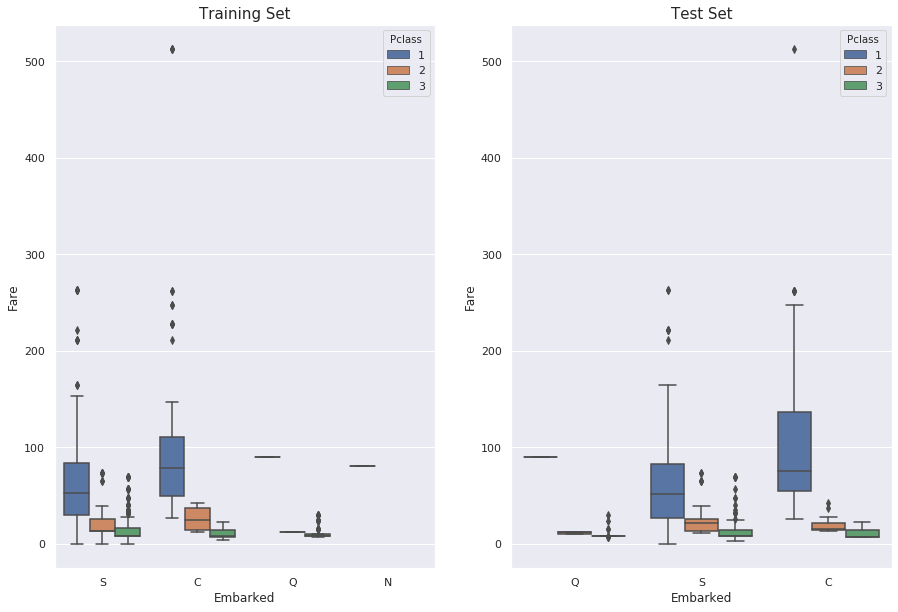

In [185]:
# Both have the same Cabin, paid $80, Pclass and are female
# so let's explore how this data is related and see if it can 
# describe which place they both embarked

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,10), ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 15)
ax2.set_title('Test Set',  fontsize = 15)

fig.show()

In [0]:
# There are more persons who paid $80 who embarked from C so
# we will assign C to those missing values
train['Embarked'] = train['Embarked'].apply(lambda x: 'C' if x == 'N' else x)

In [187]:
count_vals(train, 'Embarked')

,Total,Percent
S,644,72.28
C,170,19.08
Q,77,8.64


In [0]:
# Let's make embarked numerical values
# S = 0, C = 1, Q = 2

train['Embarked'] = train['Embarked'].apply(lambda x: 0 if x == 'S' else (1 if x == 'C' else 2))
test['Embarked'] = test['Embarked'].apply(lambda x: 0 if x == 'S' else (1 if x == 'C' else 2))

In [189]:
count_vals(train, 'Embarked')

,Total,Percent
0,644,72.28
1,170,19.08
2,77,8.64


In [190]:
count_vals(test, 'Embarked')

,Total,Percent
0,270,64.59
1,102,24.40
2,46,11.00


### Analyze Fare


In [191]:
test[test['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp
152,60.5,1,0,NaN,0,1044,3,0,0


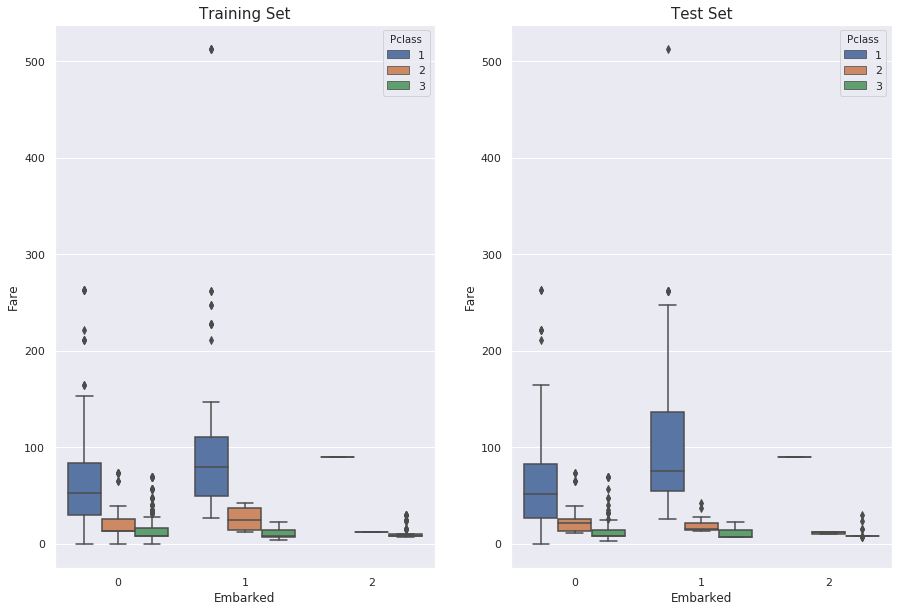

In [192]:
# Let's analyze the Fare based on the place Embarked and Pclass

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15, 10), ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 15)
ax2.set_title('Test Set',  fontsize = 15)

fig.show()

In [0]:
# It seems that in both test and train the fare would be aprox. $15
import math
test['Fare'] = test['Fare'].apply(lambda x: 15 if math.isnan(x) else x)

In [194]:
getNaNVals(test)

,NaN vals,Percentage
Age,86,20.57
SibSp,0,0.00
Sex,0,0.00
Pclass,0,0.00
PassengerId,0,0.00
Parch,0,0.00
Fare,0,0.00
Embarked,0,0.00
Cabin,0,0.00


### Analyze Age

In [195]:
getNaNVals(train)

,NaN vals,Percentage
Age,177,19.87
Survived,0,0.00
SibSp,0,0.00
Sex,0,0.00
Pclass,0,0.00
PassengerId,0,0.00
Parch,0,0.00
Fare,0,0.00
Embarked,0,0.00
Cabin,0,0.00


In [196]:
getNaNVals(test)

,NaN vals,Percentage
Age,86,20.57
SibSp,0,0.00
Sex,0,0.00
Pclass,0,0.00
PassengerId,0,0.00
Parch,0,0.00
Fare,0,0.00
Embarked,0,0.00
Cabin,0,0.00


In [0]:
# Fill NaN as 'N' in test and train
test['Age'].fillna('N', inplace=True)
train['Age'].fillna('N', inplace=True)

In [198]:
# Age is another important feature since it is significant in the probabilities
# of surviving. With rando forest we could predict the age in the ones who 
# are mising it

from sklearn.ensemble import RandomForestRegressor

def calculate_age(data):
    age_data = data.loc[:,"Age":]
    
    temp_train = age_data.loc[age_data['Age'] != 'N']
    temp_test = age_data.loc[age_data['Age'] == 'N']
    
    y = temp_train['Age'].values
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    data.loc[data['Age'] == 'N', "Age"] = predicted_age
    

    return data

calculate_age(train)
calculate_age(test)

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp
0,34.5,6,2,7.8292,0,892,3,0,0
1,47,6,0,7.0000,0,893,3,1,1
2,62,6,2,9.6875,0,894,2,0,0
3,27,6,0,8.6625,0,895,3,0,0
4,22,6,0,12.2875,1,896,3,1,1
...,...,...,...,...,...,...,...,...,...
413,29.4089,6,0,8.0500,0,1305,3,0,0
414,39,2,1,108.9000,0,1306,1,1,0
415,38.5,6,0,7.2500,0,1307,3,0,0
416,29.4089,6,0,8.0500,0,1308,3,0,0


In [199]:
getNaNVals(train)

,NaN vals,Percentage
Survived,0,0.0
SibSp,0,0.0
Sex,0,0.0
Pclass,0,0.0
PassengerId,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0
Cabin,0,0.0
Age,0,0.0


In [200]:
getNaNVals(test)

,NaN vals,Percentage
SibSp,0,0.0
Sex,0,0.0
Pclass,0,0.0
PassengerId,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0
Cabin,0,0.0
Age,0,0.0


### Survivors

Text(0.5, 0, 'Sex')

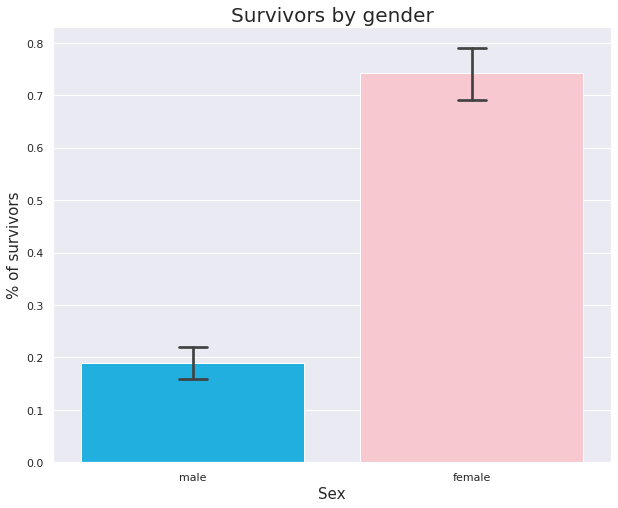

In [201]:
sns.set(style = "darkgrid")
palette = {'male':"deepskyblue", 'female':"pink"}
plt.subplots(figsize = (10, 8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data = train_data, 
                 palette = palette,
                 order = ['male', 'female'],
                 capsize = 0.1)

plt.title("Survivors by gender", fontsize=20, loc='center')
plt.ylabel("% of survivors", fontsize=15)
plt.xlabel("Sex", fontsize=15)

There are more female survivors compared to men.

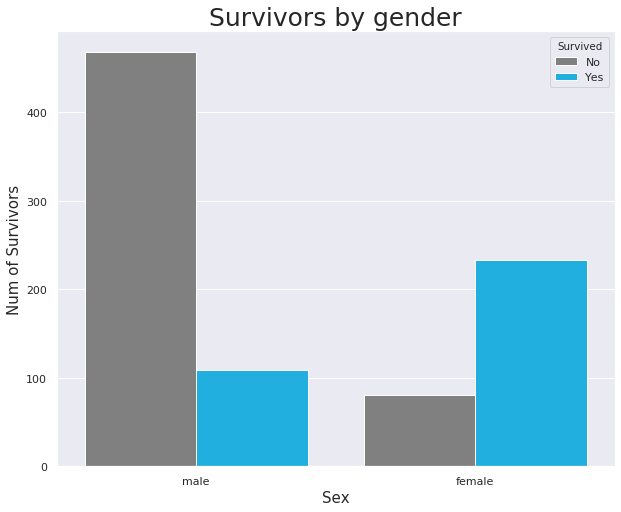

In [202]:
palette = {1:"deepskyblue", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize=(10, 8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train_data, 
                   palette = palette)

plt.title("Survivors by gender", fontsize = 25)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("Num of Survivors", fontsize = 15)

legend = ax.get_legend()
legend.set_title("Survived")
legend = legend.texts
legend[0].set_text("No")
legend[1].set_text("Yes")
plt.show()

### Passenger Class

([<matplotlib.axis.XTick at 0x7f6696eeefd0>,
 <a list of 3 Text xticklabel objects>)

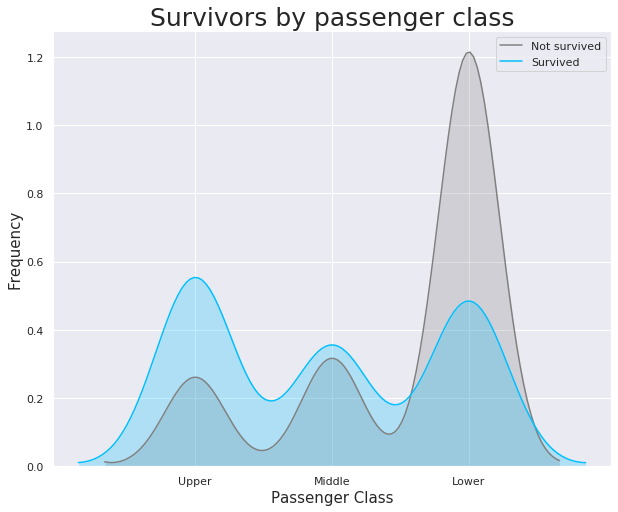

In [203]:
fig = plt.figure(figsize = (10, 8))

ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 0), 'Pclass'] , 
               color='gray',
               shade=True,
               label='Not survived')
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 1), 'Pclass'] , 
               color='deepskyblue',
               shade=True, 
               label='Survived')

plt.title('Survivors by passenger class', fontsize = 25)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train_data.Pclass.unique()), labels)

There is a relationship between being in a better class and having more probability of surviving

### Fare

Text(0.5, 0, 'Fare')

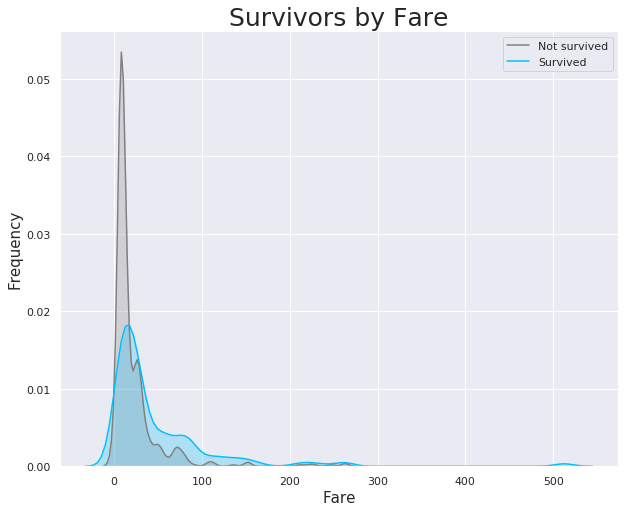

In [204]:
fig = plt.figure(figsize=(10, 8))

ax = sns.kdeplot(train_data.loc[(train_data['Survived'] == 0), 'Fare'],
                 color='gray',
                 shade=True,
                 label='Not survived')
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 1), 'Fare'],
               color='deepskyblue',
               shade=True,
               label='Survived')

plt.title('Survivors by Fare', fontsize = 25)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)

Someone who payed more than 100 had more probability of surviving

In [205]:
# It appears there are some outliers above 300
train[train['Fare'] > 300]

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
258,35,1,1,512.3292,0,259,1,1,0,1
679,36,1,1,512.3292,1,680,1,0,0,1
737,35,1,1,512.3292,0,738,1,0,0,1


In [206]:
# All of the outliers survived so we will delete this data from the dataset
train_data = train_data[train_data['Fare'] < 300]
train_data.shape

(888, 12)

### Age

Text(0.5, 0, 'Age')

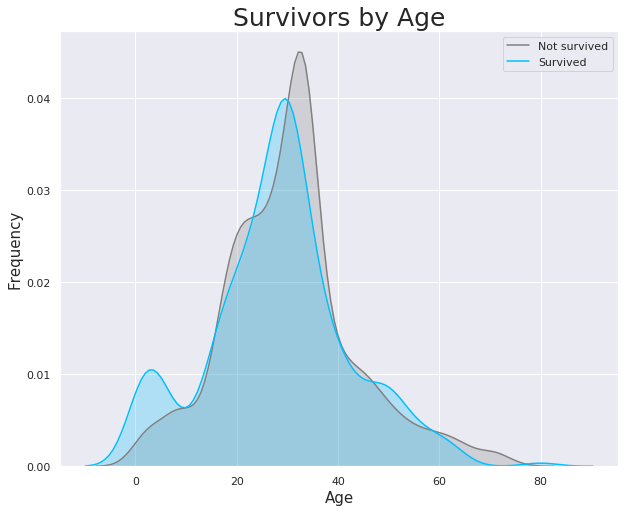

In [207]:
fig = plt.figure(figsize=(10, 8))

ax = sns.kdeplot(train.loc[(train['Survived'] == 0), 'Age'],
                 color='gray',
                 shade=True,
                 label='Not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1), 'Age'],
               color='deepskyblue',
               shade=True,
               label='Survived')

plt.title('Survivors by Age', fontsize = 25)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Age", fontsize = 15)

Since woman and children were priority, that describes the pike at around 10 or less years.

### Siblings and spouses

Text(0.5, 0, 'Siblings and spouse')

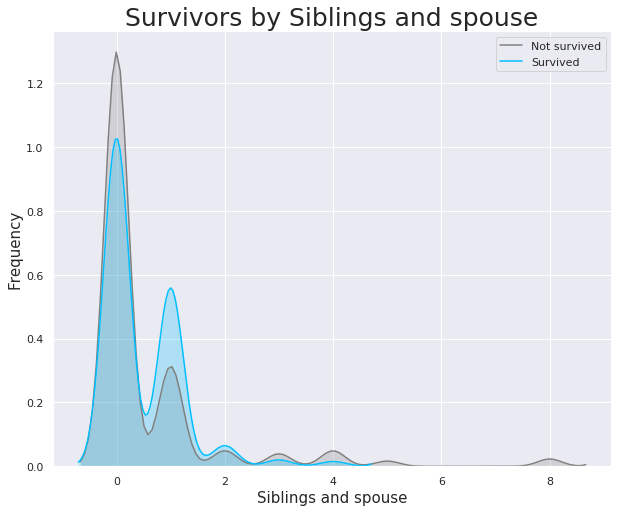

In [208]:
fig = plt.figure(figsize=(10, 8))

ax = sns.kdeplot(train_data.loc[(train_data['Survived'] == 0), 'SibSp'],
                 color='gray',
                 shade=True,
                 label='Not survived')
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 1), 'SibSp'],
               color='deepskyblue',
               shade=True,
               label='Survived')

plt.title('Survivors by Siblings and spouse', fontsize = 25)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Siblings and spouse", fontsize = 15)

It seems that if you were travelling with less people, you had better chance of surviving.

### Family

Text(0.5, 0, 'Family members')

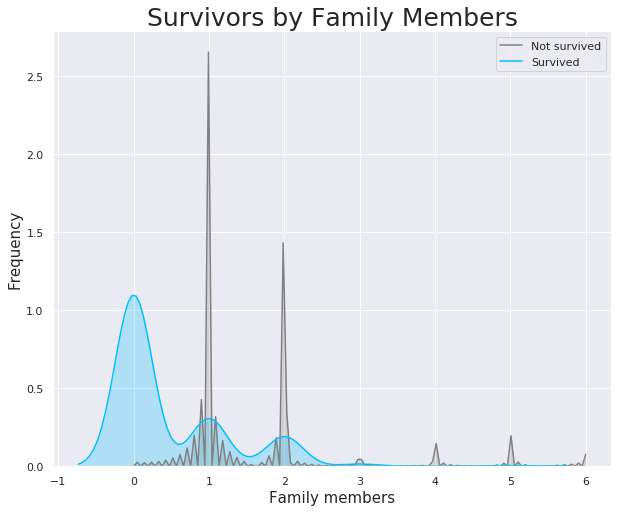

In [209]:
fig = plt.figure(figsize=(10, 8))

ax = sns.kdeplot(train_data.loc[(train_data['Survived'] == 0), 'Parch'],
                 color='gray',
                 shade=True,
                 label='Not survived')
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 1), 'Parch'],
               color='deepskyblue',
               shade=True,
               label='Survived')

plt.title('Survivors by Family Members', fontsize = 25)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Family members", fontsize = 15)

In this it also seems that if you were travelling with less people, you had better chance of surviving.

### Embarkation

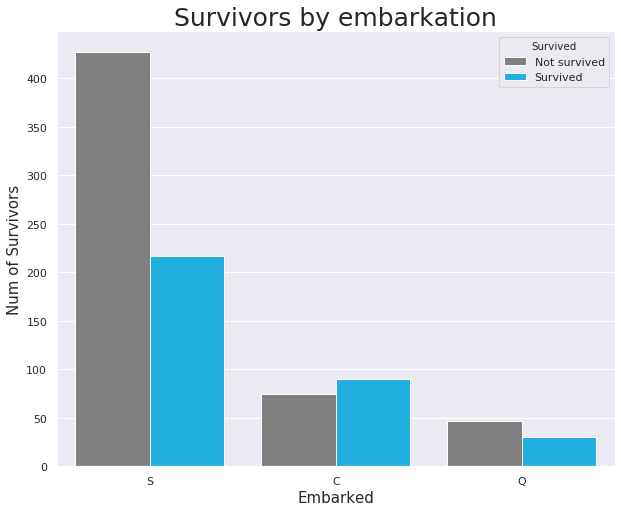

In [210]:
palette = {1:'deepskyblue', 0:'gray'}
sns.set(style="darkgrid")
plt.subplots(figsize=(10, 8))
ax = sns.countplot(x = "Embarked", 
                   hue="Survived",
                   data = train_data, 
                   palette = palette)

plt.title("Survivors by embarkation", fontsize = 25)
plt.xlabel("Embarked", fontsize = 15);
plt.ylabel("Num of Survivors", fontsize = 15)

legend = ax.get_legend()
legend.set_title("Survived")
legend = legend.texts
legend[0].set_text('Not survived')
legend[1].set_text('Survived')
plt.show()

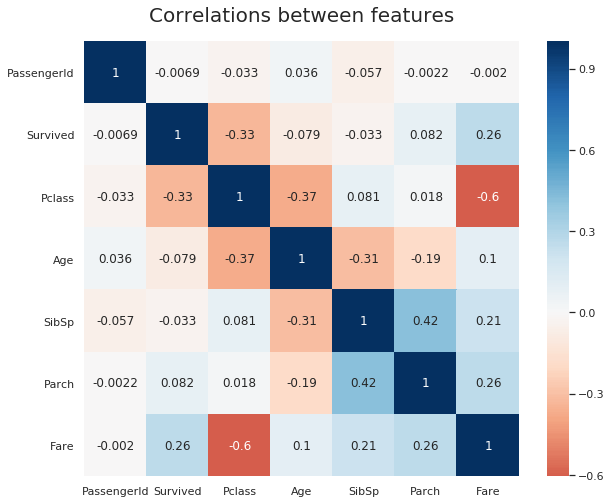

In [211]:
mask = np.zeros_like(train_data.corr(), dtype=np.bool)

plt.subplots(figsize = (10, 8))
sns.heatmap(train_data.corr(), 
            annot = True,
            mask = mask,
            cmap = 'RdBu',
            linecolor='gray',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations between features", y = 1.03, fontsize = 20, pad = 20);
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)

plt.show()

## Train Data

In [212]:
train.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22,6,0,7.2500,0,1,3,0,1,0
1,38,2,1,71.2833,0,2,1,1,1,1
2,26,6,0,7.9250,0,3,3,1,0,1
3,35,2,0,53.1000,0,4,1,1,1,1
4,35,6,0,8.0500,0,5,3,0,0,0


In [0]:
# Divide the data between features and target
X = train.drop('Survived', axis=1)
y = train['Survived']

In [214]:
X.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp
0,22,6,0,7.2500,0,1,3,0,1
1,38,2,1,71.2833,0,2,1,1,1
2,26,6,0,7.9250,0,3,3,1,0
3,35,2,0,53.1000,0,4,1,1,1
4,35,6,0,8.0500,0,5,3,0,0


In [215]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((757, 9), (134, 9), (757,), (134,))

In [0]:
headers = X_train.columns

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#test_norm = sc.transform(test)

In [219]:
pd.DataFrame(X_train, columns=headers).head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp
0,-1.401279,0.095371,1.047923,-0.282456,-0.488903,1.116203,0.839173,-0.748882,-0.476238
1,0.768468,1.164936,-0.571011,-0.096437,4.364858,-0.320517,0.839173,-0.748882,0.422795
2,1.815932,-0.974194,1.047923,0.931726,-0.488903,0.206151,-1.558012,1.335323,0.422795
3,1.928160,0.630153,-0.571011,-0.501646,-0.488903,-1.126009,0.839173,-0.748882,-0.476238
4,-1.027185,0.095371,-0.571011,-0.135223,-0.488903,1.348556,-0.359419,-0.748882,-0.476238


## Train and Test model!

### Logistic Regression

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

model = LogisticRegression(solver='liblinear', penalty= 'l1')

model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)

print ("Accuracy: {}".format(round(accuracy_score(y_pred, y_test), 3)))

Accuracy: 0.813


In [230]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(X_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)

0.806


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [250]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

n_estimators = [140, 145, 150, 155, 160];
max_depth = range(1, 10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.30, random_state=15)

parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions}

grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              ran

In [0]:
test_pred = grid.predict(test)
submission = pd.DataFrame({
        "PassengerId": test['PassengerId'],
        "Survived": test_pred})

submission['PassengerId'] = submission['PassengerId'].astype(int)
submission['Survived'] = submission['Survived'].astype(int)

submission.to_csv("titanic_results.csv", index=False)